# Income Estimation model

# Pre-processing steps

Random Forest ML modele uyqun olan pre processing stepleri icra olunur

1. Descriptive statistika

2. Feature Engineering - Mean ve Max istifade ederek qeyd edilen sutunlari yaradin.

payment_period_mean_by_bin_age,   payment_period_max_by_bin_age

amount_mean_by_txn_description,   amount_max_by_txn_description

balance_mean_by_merchant_suburb,  balance_max_by_merchant_suburb

3. Unique deyerleri chox olan (10+) sutunlari drop edin

4. Missing value-lari mode() ile evezleyin

5. LabelEncoder() ile kateqorik sutunlari numerice chevirin

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [169]:
data=pd.read_excel(r'C:\Users\Aysel Quliyeva\Desktop\data science with python\lesson 15\regression task\income_est.xlsx')
data


,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,1,1,Wednesday,7,52856
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7,52856
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7,52856
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,f2ef6270-cf91-409f-a6a2-fbd6735ea500,NSW,Byron Bay,debit,authorized,1c12c9ad77894ef8b507fb091e41e928,POS,20-30,2018,8,1,8,9,Wednesday,7,52856
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,QLD,Bundall,debit,authorized,cd0113426970425a8524e55f4079408f,POS,20-30,2018,8,1,18,19,Wednesday,7,52856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-2153562714,24,3712.56,9707.77,NaN,CUS-423725039,2018-10-24,Linda,F,-31.88,116.00,0.0,NaN,NaN,NaN,credit,posted,fe1b1a6bdd9b43f7985acc4af7b0a101,PAY/SALARY,20-30,2018,10,24,14,0,Wednesday,30,45169
12039,ACC-1217063613,27,4863.62,4863.86,NaN,CUS-1739931018,2018-09-26,Kimberly,F,-37.82,147.61,0.0,NaN,NaN,NaN,credit,posted,8659baa692924427aefbf4077c5a9d67,PAY/SALARY,20-30,2018,9,26,13,0,Wednesday,30,59174
12040,ACC-1217063613,27,4863.62,8905.77,NaN,CUS-1739931018,2018-10-26,Kimberly,F,-37.82,147.61,0.0,NaN,NaN,NaN,credit,posted,e6d8f31d269d4e8388e115719a59dd98,PAY/SALARY,20-30,2018,10,26,13,0,Friday,30,59174
12041,ACC-3100725361,25,6107.23,6111.57,NaN,CUS-2178051368,2018-09-26,Ronald,M,-17.03,145.73,0.0,NaN,NaN,NaN,credit,posted,7eb1fdb7aefb40d1a8ada1d27f556542,PAY/SALARY,20-30,2018,9,26,15,0,Wednesday,30,74305


In [170]:
pd.set_option('display.max_columns', None)
data.describe(include='all')

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
count,12043,12043.000000,12043.000000,12043.000000,7717.000000,12043,12043,12043,12043,12043.000000,12043.000000,883.0,7717,7717,7717,12043,12043,12043,12043,12043,12043.0,12043.000000,12043.000000,12043.000000,12043.000000,12043,12043.000000,12043.000000
unique,100,NaN,NaN,NaN,NaN,100,91,80,2,NaN,NaN,NaN,5725,8,1609,2,2,12043,6,7,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,ACC-1598451071,NaN,NaN,NaN,NaN,CUS-2487424745,2018-09-28,Michael,M,NaN,NaN,NaN,106e1272-44ab-4dcb-a438-dd98e0071e51,NSW,Melbourne,debit,authorized,a623070bfead4541a6b0fff8a09e706c,SALES-POS,20-30,NaN,NaN,NaN,NaN,NaN,Friday,NaN,NaN
freq,578,NaN,NaN,NaN,NaN,578,174,746,6285,NaN,NaN,NaN,14,2169,255,11160,7717,1,3934,5071,NaN,NaN,NaN,NaN,NaN,2073,NaN,NaN
mean,NaN,30.582330,187.933588,14704.195553,0.802644,NaN,NaN,NaN,NaN,-38.164347,143.648563,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,9.011957,15.862908,13.268621,19.009632,NaN,11.470315,68652.099311
std,NaN,10.046343,592.599934,31503.722652,0.398029,NaN,NaN,NaN,NaN,54.622791,16.669352,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.816511,8.899598,5.777284,19.879112,NaN,7.049721,24300.863348
min,NaN,18.000000,0.100000,0.240000,0.000000,NaN,NaN,NaN,NaN,-573.000000,114.620000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.000000,1.000000,0.000000,0.000000,NaN,0.000000,29875.000000
25%,NaN,22.000000,16.000000,3158.585000,1.000000,NaN,NaN,NaN,NaN,-37.700000,138.690000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.000000,8.000000,9.000000,0.000000,NaN,7.000000,51650.000000
50%,NaN,28.000000,29.000000,6432.010000,1.000000,NaN,NaN,NaN,NaN,-33.890000,145.230000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,9.000000,16.000000,13.000000,13.000000,NaN,14.000000,60494.000000
75%,NaN,38.000000,53.655000,12465.945000,1.000000,NaN,NaN,NaN,NaN,-30.750000,151.220000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,10.000000,24.000000,18.000000,36.000000,NaN,14.000000,81701.000000


In [171]:
##payment_period_mean_by_bin_age, payment_period_max_by_bin_age, amount_mean_by_txn_description, amount_max_by_txn_description,
#balance_mean_by_merchant_suburb, balance_max_by_merchant_suburb

data['payment_period_mean_by_bin_age'] = data.groupby('bin_age')['payment_period'].transform('mean')
data['payment_period_max_by_bin_age'] = data.groupby('bin_age')['payment_period'].transform('max')
data['amount_mean_by_txn_description'] = data.groupby('txn_description')['amount'].transform('mean')
data['amount_max_by_txn_description'] = data.groupby('txn_description')['amount'].transform('max')
data['balance_mean_by_merchant_suburb'] = data.groupby('merchant_suburb')['balance'].transform('mean')
data['balance_max_by_merchant_suburb'] = data.groupby('merchant_suburb')['balance'].transform('max')

data

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary,payment_period_mean_by_bin_age,payment_period_max_by_bin_age,amount_mean_by_txn_description,amount_max_by_txn_description,balance_mean_by_merchant_suburb,balance_max_by_merchant_suburb
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,1,1,Wednesday,7,52856,13.650562,61,40.407412,7081.09,5340.941250,22315.43
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7,52856,13.650562,61,39.909789,4233.00,10934.540901,205177.72
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7,52856,13.650562,61,39.909789,4233.00,2391.202000,6808.64
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,f2ef6270-cf91-409f-a6a2-fbd6735ea500,NSW,Byron Bay,debit,authorized,1c12c9ad77894ef8b507fb091e41e928,POS,20-30,2018,8,1,8,9,Wednesday,7,52856,13.650562,61,40.407412,7081.09,595.520000,1085.52
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,QLD,Bundall,debit,authorized,cd0113426970425a8524e55f4079408f,POS,20-30,2018,8,1,18,19,Wednesday,7,52856,13.650562,61,40.407412,7081.09,2117.856000,4632.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-2153562714,24,3712.56,9707.77,NaN,CUS-423725039,2018-10-24,Linda,F,-31.88,116.00,0.0,NaN,NaN,NaN,credit,posted,fe1b1a6bdd9b43f7985acc4af7b0a101,PAY/SALARY,20-30,2018,10,24,14,0,Wednesday,30,45169,13.650562,61,1898.728029,8835.98,NaN,NaN
12039,ACC-1217063613,27,4863.62,4863.86,NaN,CUS-1739931018,2018-09-26,Kimberly,F,-37.82,147.61,0.0,NaN,NaN,NaN,credit,posted,8659baa692924427aefbf4077c5a9d67,PAY/SALARY,20-30,2018,9,26,13,0,Wednesday,30,59174,13.650562,61,1898.728029,8835.98,NaN,NaN
12040,ACC-1217063613,27,4863.62,8905.77,NaN,CUS-1739931018,2018-10-26,Kimberly,F,-37.82,147.61,0.0,NaN,NaN,NaN,credit,posted,e6d8f31d269d4e8388e115719a59dd98,PAY/SALARY,20-30,2018,10,26,13,0,Friday,30,59174,13.650562,61,1898.728029,8835.98,NaN,NaN
12041,ACC-3100725361,25,6107.23,6111.57,NaN,CUS-2178051368,2018-09-26,Ronald,M,-17.03,145.73,0.0,NaN,NaN,NaN,credit,posted,7eb1fdb7aefb40d1a8ada1d27f556542,PAY/SALARY,20-30,2018,9,26,15,0,Wednesday,30,74305,13.650562,61,1898.728029,8835.98,NaN,NaN


In [172]:
pd.set_option('display.max_columns', None)
data.describe(include='all')

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary,payment_period_mean_by_bin_age,payment_period_max_by_bin_age,amount_mean_by_txn_description,amount_max_by_txn_description,balance_mean_by_merchant_suburb,balance_max_by_merchant_suburb
count,12043,12043.000000,12043.000000,12043.000000,7717.000000,12043,12043,12043,12043,12043.000000,12043.000000,883.0,7717,7717,7717,12043,12043,12043,12043,12043,12043.0,12043.000000,12043.000000,12043.000000,12043.000000,12043,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,7717.000000,7717.000000
unique,100,NaN,NaN,NaN,NaN,100,91,80,2,NaN,NaN,NaN,5725,8,1609,2,2,12043,6,7,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ACC-1598451071,NaN,NaN,NaN,NaN,CUS-2487424745,2018-09-28,Michael,M,NaN,NaN,NaN,106e1272-44ab-4dcb-a438-dd98e0071e51,NSW,Melbourne,debit,authorized,a623070bfead4541a6b0fff8a09e706c,SALES-POS,20-30,NaN,NaN,NaN,NaN,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,578,NaN,NaN,NaN,NaN,578,174,746,6285,NaN,NaN,NaN,14,2169,255,11160,7717,1,3934,5071,NaN,NaN,NaN,NaN,NaN,2073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,30.582330,187.933588,14704.195553,0.802644,NaN,NaN,NaN,NaN,-38.164347,143.648563,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,9.011957,15.862908,13.268621,19.009632,NaN,11.470315,68652.099311,11.470315,33.660301,187.933588,4819.233066,11871.056585,59225.017797
std,NaN,10.046343,592.599934,31503.722652,0.398029,NaN,NaN,NaN,NaN,54.622791,16.669352,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.816511,8.899598,5.777284,19.879112,NaN,7.049721,24300.863348,2.033555,23.336297,481.585450,2284.221028,14088.448192,78402.243162
min,NaN,18.000000,0.100000,0.240000,0.000000,NaN,NaN,NaN,NaN,-573.000000,114.620000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.000000,1.000000,0.000000,0.000000,NaN,0.000000,29875.000000,7.000000,7.000000,39.909789,1916.000000,6.480000,6.480000
25%,NaN,22.000000,16.000000,3158.585000,1.000000,NaN,NaN,NaN,NaN,-37.700000,138.690000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.000000,8.000000,9.000000,0.000000,NaN,7.000000,51650.000000,9.047577,14.000000,39.909789,1981.000000,5178.075000,10471.980000
50%,NaN,28.000000,29.000000,6432.010000,1.000000,NaN,NaN,NaN,NaN,-33.890000,145.230000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,9.000000,16.000000,13.000000,13.000000,NaN,14.000000,60494.000000,11.276875,14.000000,40.407412,4233.000000,8946.267500,21964.780000
75%,NaN,38.000000,53.655000,12465.945000,1.000000,NaN,NaN,NaN,NaN,-30.750000,151.220000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,10.000000,24.000000,18.000000,36.000000,NaN,14.000000,81701.000000,13.650562,61.000000,77.613077,7081.090000,13823.178431,60310.070000


In [173]:
data.drop(data[['account']], axis=1, inplace=True)
data.drop(data[['customer_id']], axis=1, inplace=True)
data.drop(data[['date']], axis=1, inplace=True)
data.drop(data[['first_name']], axis=1, inplace=True)
data.drop(data[['transaction_id']], axis=1, inplace=True)
data.drop(data[['merchant_id']], axis=1, inplace=True)
data.drop(data[['merchant_suburb']], axis=1, inplace=True)
data.drop(data[['merchant_code']], axis=1, inplace=True)




In [174]:
data.isnull().sum()

age                                   0
amount                                0
balance                               0
card_present_flag                  4326
gender                                0
latitude                              0
longitude                             0
merchant_state                     4326
movement                              0
status                                0
txn_description                       0
bin_age                               0
year                                  0
month                                 0
day                                   0
hour                                  0
minute                                0
dow                                   0
payment_period                        0
annual_salary                         0
payment_period_mean_by_bin_age        0
payment_period_max_by_bin_age         0
amount_mean_by_txn_description        0
amount_max_by_txn_description         0
balance_mean_by_merchant_suburb    4326


In [175]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        if data[i].dtype==object:
            data[i].fillna(data[i].mode()[0], inplace=True)
        else:
            data[i].fillna(data[i].mean(), inplace=True)

C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_2844\2147114010.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mean(), inplace=True)
C:\Users\Aysel Quliyeva\AppData\Local\Temp\ipykernel_2844\2147114010.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [176]:
data.isnull().sum()

age                                0
amount                             0
balance                            0
card_present_flag                  0
gender                             0
latitude                           0
longitude                          0
merchant_state                     0
movement                           0
status                             0
txn_description                    0
bin_age                            0
year                               0
month                              0
day                                0
hour                               0
minute                             0
dow                                0
payment_period                     0
annual_salary                      0
payment_period_mean_by_bin_age     0
payment_period_max_by_bin_age      0
amount_mean_by_txn_description     0
amount_max_by_txn_description      0
balance_mean_by_merchant_suburb    0
balance_max_by_merchant_suburb     0
dtype: int64

In [177]:


num_cols = [i for i in data.columns if data[i].dtypes == 'object']
print(num_cols)


['gender', 'merchant_state', 'movement', 'status', 'txn_description', 'bin_age', 'dow']


In [178]:
#LabelEncoder() ile kateqorik sutunlari numerice chevirin
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'merchant_state', 'movement', 'status', 'txn_description', 'bin_age', 'dow']
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [179]:
data

,age,amount,balance,card_present_flag,gender,latitude,longitude,merchant_state,movement,status,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary,payment_period_mean_by_bin_age,payment_period_max_by_bin_age,amount_mean_by_txn_description,amount_max_by_txn_description,balance_mean_by_merchant_suburb,balance_max_by_merchant_suburb
0,26,16.25,35.39,1.000000,0,-27.95,153.41,3,1,0,4,0,2018,8,1,1,1,6,7,52856,13.650562,61,40.407412,7081.09,5340.941250,22315.430000
1,26,14.19,21.20,0.000000,0,-27.95,153.41,1,1,0,5,0,2018,8,1,1,13,6,7,52856,13.650562,61,39.909789,4233.00,10934.540901,205177.720000
2,26,3.25,17.95,1.000000,0,-27.95,153.41,3,1,0,5,0,2018,8,1,1,51,6,7,52856,13.650562,61,39.909789,4233.00,2391.202000,6808.640000
3,26,14.10,3.85,1.000000,0,-27.95,153.41,1,1,0,4,0,2018,8,1,8,9,6,7,52856,13.650562,61,40.407412,7081.09,595.520000,1085.520000
4,26,10.67,1006.85,1.000000,0,-27.95,153.41,3,1,0,4,0,2018,8,1,18,19,6,7,52856,13.650562,61,40.407412,7081.09,2117.856000,4632.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,24,3712.56,9707.77,0.802644,0,-31.88,116.00,1,0,1,1,0,2018,10,24,14,0,6,30,45169,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797
12039,27,4863.62,4863.86,0.802644,0,-37.82,147.61,1,0,1,1,0,2018,9,26,13,0,6,30,59174,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797
12040,27,4863.62,8905.77,0.802644,0,-37.82,147.61,1,0,1,1,0,2018,10,26,13,0,0,30,59174,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797
12041,25,6107.23,6111.57,0.802644,1,-17.03,145.73,1,0,1,1,0,2018,9,26,15,0,6,30,74305,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797


In [180]:
data.day.value_counts()

day
17    446
28    445
3     426
19    424
26    422
5     417
14    416
18    412
12    412
21    411
27    409
24    405
2     405
4     402
10    400
22    399
13    395
11    394
25    388
15    383
9     382
6     381
1     377
29    372
7     371
20    369
8     365
23    362
30    339
31    294
16    220
Name: count, dtype: int64

In [181]:
data.drop(data[['year']], axis=1, inplace=True)


In [182]:
data

,age,amount,balance,card_present_flag,gender,latitude,longitude,merchant_state,movement,status,txn_description,bin_age,month,day,hour,minute,dow,payment_period,annual_salary,payment_period_mean_by_bin_age,payment_period_max_by_bin_age,amount_mean_by_txn_description,amount_max_by_txn_description,balance_mean_by_merchant_suburb,balance_max_by_merchant_suburb
0,26,16.25,35.39,1.000000,0,-27.95,153.41,3,1,0,4,0,8,1,1,1,6,7,52856,13.650562,61,40.407412,7081.09,5340.941250,22315.430000
1,26,14.19,21.20,0.000000,0,-27.95,153.41,1,1,0,5,0,8,1,1,13,6,7,52856,13.650562,61,39.909789,4233.00,10934.540901,205177.720000
2,26,3.25,17.95,1.000000,0,-27.95,153.41,3,1,0,5,0,8,1,1,51,6,7,52856,13.650562,61,39.909789,4233.00,2391.202000,6808.640000
3,26,14.10,3.85,1.000000,0,-27.95,153.41,1,1,0,4,0,8,1,8,9,6,7,52856,13.650562,61,40.407412,7081.09,595.520000,1085.520000
4,26,10.67,1006.85,1.000000,0,-27.95,153.41,3,1,0,4,0,8,1,18,19,6,7,52856,13.650562,61,40.407412,7081.09,2117.856000,4632.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,24,3712.56,9707.77,0.802644,0,-31.88,116.00,1,0,1,1,0,10,24,14,0,6,30,45169,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797
12039,27,4863.62,4863.86,0.802644,0,-37.82,147.61,1,0,1,1,0,9,26,13,0,6,30,59174,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797
12040,27,4863.62,8905.77,0.802644,0,-37.82,147.61,1,0,1,1,0,10,26,13,0,0,30,59174,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797
12041,25,6107.23,6111.57,0.802644,1,-17.03,145.73,1,0,1,1,0,9,26,15,0,6,30,74305,13.650562,61,1898.728029,8835.98,11871.056585,59225.017797


# Modeling Steps

Model 1. default , 2. importance uzre ve 3. optimized deyerler uzerinden qurulur her uchu uzre Train ve Test R2 accuracy deyerine baxilir.

Importance deyeri 1%-35% arasinda olan deyishenlerden istifade ederek optimized model qurulur

In [183]:
X = data.drop('annual_salary', axis=1)
y = data['annual_salary']

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
from sklearn import metrics

def evaluate(model,X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    return results_df

In [186]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [187]:
from sklearn.tree import export_text

one_tree = reg.estimators_[7]

tree_rules_rf = export_text(one_tree, feature_names=list(X_train.columns))
print(tree_rules_rf)

|--- balance <= 10161.72
|   |--- balance <= 6014.91
|   |   |--- month <= 8.50
|   |   |   |--- balance <= 3358.32
|   |   |   |   |--- longitude <= 153.03
|   |   |   |   |   |--- longitude <= 152.15
|   |   |   |   |   |   |--- latitude <= -34.19
|   |   |   |   |   |   |   |--- latitude <= -37.50
|   |   |   |   |   |   |   |   |--- latitude <= -40.43
|   |   |   |   |   |   |   |   |   |--- value: [30034.00]
|   |   |   |   |   |   |   |   |--- latitude >  -40.43
|   |   |   |   |   |   |   |   |   |--- latitude <= -37.84
|   |   |   |   |   |   |   |   |   |   |--- latitude <= -37.84
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- latitude >  -37.84
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- latitude >  -37.84
|   |   |   |   |   |   |   |   |   |   |--- latitude <= -37.83
|   |   |   |   |   |   |   |   |   |   |   |--- value: [3671

In [188]:
evaluate(reg, X_train, y_train, X_test, y_test)

,Metric,Train,Test
0,MAE,214.198720,5.056201e+02
1,MSE,826249.514358,3.583539e+06
2,RMSE,908.982681,1.893024e+03
3,R2,99.860242,9.938988e+01


In [189]:
def plot_feature_importances(model, feature_names):
    
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
   
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis() 
    plt.show()
    
    return importance_df

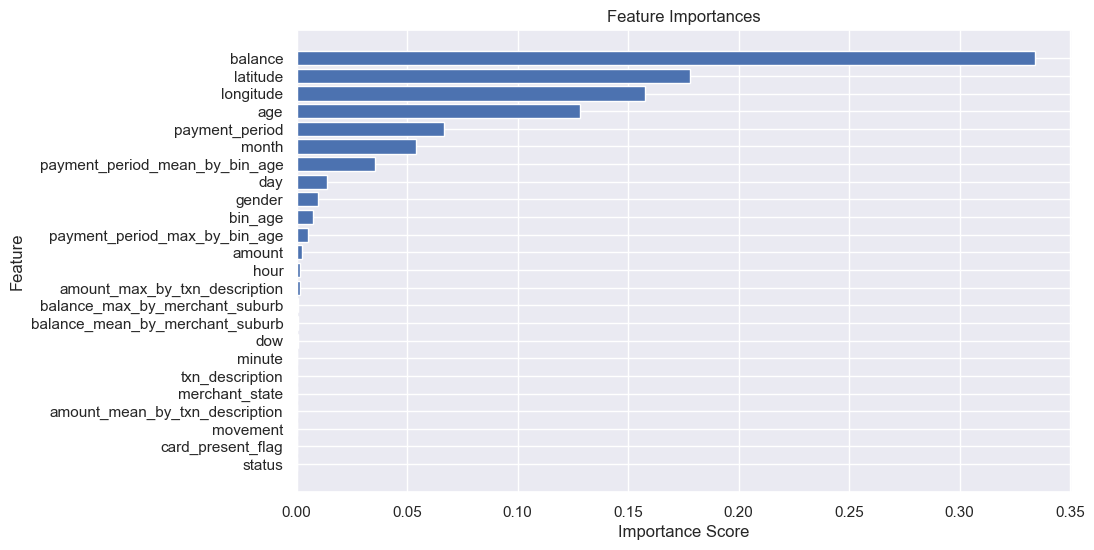

,Feature,Importance
2,balance,0.333942
5,latitude,0.178077
6,longitude,0.157893
0,age,0.128208
17,payment_period,0.066711
12,month,0.054010
18,payment_period_mean_by_bin_age,0.035599
13,day,0.013716
4,gender,0.009939
11,bin_age,0.007581


In [190]:
feature_names = X_train.columns

feature_importance_df = plot_feature_importances(reg, feature_names)

feature_importance_df

In [191]:
feature_importance_df.Feature.tolist()

['balance',
 'latitude',
 'longitude',
 'age',
 'payment_period',
 'month',
 'payment_period_mean_by_bin_age',
 'day',
 'gender',
 'bin_age',
 'payment_period_max_by_bin_age',
 'amount',
 'hour',
 'amount_max_by_txn_description',
 'balance_max_by_merchant_suburb',
 'balance_mean_by_merchant_suburb',
 'dow',
 'minute',
 'txn_description',
 'merchant_state',
 'amount_mean_by_txn_description',
 'movement',
 'card_present_flag',
 'status']

In [192]:
#Importance deyeri 1%-35% arasinda olan deyishenlerden istifade ederek optimized model qurulur

important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

print(important_features)


['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']


In [193]:
reg_selected = RandomForestRegressor(random_state=42)

reg_selected.fit(X_train[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']],y_train)

RandomForestRegressor(random_state=42)

In [194]:
evaluate(reg_selected,X_train[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']],y_train, 
         X_test[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']], y_test)

,Metric,Train,Test
0,MAE,134.377082,3.195498e+02
1,MSE,532466.699397,2.413914e+06
2,RMSE,729.703158,1.553678e+03
3,R2,99.909935,9.958902e+01


In [195]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]

# Create the random grid
random_grid = {'n_estimators': n_estimators, # Number of trees in random forest
               'max_features': ['sqrt', 0.3, 0.5, None], # Number of features to consider at every split
               'max_depth': max_depth, # Maximum number of levels in tree
               'min_samples_split': [20,50], # Minimum number of samples required to split a node
               'min_samples_leaf': [5, 8, 10]} # Minimum number of samples required at each leaf node

In [196]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']
], y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['sqrt', 0.3, 0.5,
                                                         None],
                                        'min_samples_leaf': [5, 8, 10],
                                        'min_samples_split': [20, 50],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=1)

In [197]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 91}

In [199]:
optimized_model = rf_random.best_estimator_

evaluate(optimized_model, X_train[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']
         ],y_train,  X_test[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']], y_test)


,Metric,Train,Test
0,MAE,1.043319e+03,1.253666e+03
1,MSE,4.746910e+06,6.452051e+06
2,RMSE,2.178740e+03,2.540089e+03
3,R2,9.919707e+01,9.890150e+01


# Deployment

Final model uzerinden income_deploy uchun prediction olunur

In [235]:
deploy_data = pd.read_excel(r"C:\Users\Aysel Quliyeva\Desktop\data science with python\lesson 15\regression task\income_deploy.xlsx")
deploy_data

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period
0,ACC-4258502723,24,116.26,4241.76,1.0,CUS-3378712515,2018-10-08,Kimberly,F,-37.74,145.45,NaN,e7bf57d9-9eeb-41b4-886e-efb676a5bd80,QLD,Port Douglas,debit,authorized,b1e504ecf44840abb3a48b4ab8510f00,SALES-POS,20-30,2018,10,8,13,33,Monday,7
1,ACC-4258502723,24,14.18,5122.49,1.0,CUS-3378712515,2018-10-11,Kimberly,F,-37.74,145.45,NaN,7770e116-8b4a-4d48-b0f5-7a6399958848,VIC,Melton,debit,authorized,dfa272cc57334c7ca87f61a258cb5b90,SALES-POS,20-30,2018,10,11,12,7,Thursday,7
2,ACC-1279356312,44,17.40,5906.28,1.0,CUS-1892177589,2018-08-29,Tyler,M,-37.73,144.79,NaN,8bee9f57-4517-4f80-b7ee-c161f33421e2,VIC,Preston,debit,authorized,d87dc36be2a2414784dd1c84ced28c71,POS,40-50,2018,8,29,9,43,Wednesday,14
3,ACC-1344825761,46,22.00,15729.73,NaN,CUS-1499065773,2018-08-17,Sarah,F,-33.91,151.09,NaN,NaN,NaN,NaN,debit,posted,4d250222351c4fdb90f7a3085f881276,PAYMENT,40-50,2018,8,17,14,0,Friday,14
4,ACC-2171593283,19,33.00,11168.81,NaN,CUS-2317998716,2018-09-06,Fernando,M,-36.04,146.94,NaN,NaN,NaN,NaN,debit,posted,a4154a29a5d642ca9643b402a87e39d3,PAYMENT,<20,2018,9,6,5,0,Thursday,14
5,ACC-240804743,29,56.00,7651.46,NaN,CUS-261674136,2018-08-29,Kenneth,M,-30.75,121.48,NaN,NaN,NaN,NaN,debit,posted,010cfffccf6c4fefb0a7d0b88a6d68da,PAYMENT,20-30,2018,8,29,14,0,Wednesday,14
6,ACC-3954677887,47,24.00,1161.91,NaN,CUS-3716701010,2018-08-11,Ruth,F,-32.28,115.72,NaN,NaN,NaN,NaN,debit,posted,ec40f0d4f9be46f18d93bf86971f38dc,PAYMENT,40-50,2018,8,11,23,0,Saturday,7
7,ACC-2920611728,69,39.12,5215.77,1.0,CUS-1388323263,2018-09-12,Tyler,M,-37.76,144.96,NaN,9cf12ed7-1600-403d-bb24-7f61d51609ef,VIC,Hoppers Crossing,debit,authorized,9c4b758fc15c4aaca329872b206da045,SALES-POS,60-70,2018,9,12,1,12,Wednesday,7
8,ACC-2305712452,18,18.04,2390.88,1.0,CUS-1842679196,2018-08-31,Debra,F,-34.89,138.61,NaN,ae05bf40-b7dc-41a1-8ac1-61c0e8608760,SA,Gilles Plains,debit,authorized,03a5e32154914752a4316fa6663633b6,SALES-POS,<20,2018,8,31,21,19,Friday,7
9,ACC-1710017148,19,16.18,1609.16,1.0,CUS-883482547,2018-08-01,Michelle,F,-34.01,150.82,NaN,499b1c74-d767-43d6-a084-b20d00010c70,NSW,Blacktown,debit,authorized,927d07bdbeb743ebab2865f86132cd99,POS,<20,2018,8,1,14,37,Wednesday,14


In [236]:
deploy_data.describe(include='all')

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period
count,30,30.00000,30.000000,30.00000,16.000000,30,30,30,30,30.000000,30.000000,5.0,16,16,16,30,30,30,30,30,30.0,30.000000,30.000000,30.000000,30.000000,30,30.000000
unique,27,NaN,NaN,NaN,NaN,27,28,25,2,NaN,NaN,NaN,16,5,16,2,2,30,5,6,NaN,NaN,NaN,NaN,NaN,6,NaN
top,ACC-4258502723,NaN,NaN,NaN,NaN,CUS-3378712515,2018-10-08,Kimberly,M,NaN,NaN,NaN,e7bf57d9-9eeb-41b4-886e-efb676a5bd80,VIC,Port Douglas,debit,authorized,b1e504ecf44840abb3a48b4ab8510f00,SALES-POS,20-30,NaN,NaN,NaN,NaN,NaN,Wednesday,NaN
freq,2,NaN,NaN,NaN,NaN,2,2,2,16,NaN,NaN,NaN,1,7,1,25,16,1,8,12,NaN,NaN,NaN,NaN,NaN,9,NaN
mean,NaN,31.60000,280.705667,5160.87200,0.875000,NaN,NaN,NaN,NaN,-68.681667,149.312000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.733333,16.233333,11.800000,10.333333,NaN,9.800000
std,NaN,12.48613,583.629855,3397.26541,0.341565,NaN,NaN,NaN,NaN,137.199734,31.282607,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.784915,9.019838,5.990798,14.360706,NaN,3.942693
min,NaN,18.00000,3.670000,134.78000,0.000000,NaN,NaN,NaN,NaN,-573.000000,115.720000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,NaN,22.00000,22.500000,2400.68000,1.000000,NaN,NaN,NaN,NaN,-37.737500,140.200000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,8.000000,8.000000,9.250000,0.000000,NaN,7.000000
50%,NaN,26.50000,39.515000,4818.13000,1.000000,NaN,NaN,NaN,NaN,-33.935000,145.450000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,9.000000,16.500000,13.000000,1.500000,NaN,7.000000
75%,NaN,40.00000,101.000000,7146.98500,1.000000,NaN,NaN,NaN,NaN,-31.925000,151.210000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,9.000000,23.000000,14.000000,15.750000,NaN,14.000000


In [237]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'merchant_state', 'movement', 'status', 'txn_description', 'bin_age', 'dow']
le = LabelEncoder()

for col in cat_cols:
    deploy_data[col] = le.fit_transform(deploy_data[col])

In [238]:
deploy_data

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period
0,ACC-4258502723,24,116.26,4241.76,1.0,CUS-3378712515,2018-10-08,Kimberly,0,-37.74,145.45,NaN,e7bf57d9-9eeb-41b4-886e-efb676a5bd80,1,Port Douglas,1,0,b1e504ecf44840abb3a48b4ab8510f00,4,0,2018,10,8,13,33,1,7
1,ACC-4258502723,24,14.18,5122.49,1.0,CUS-3378712515,2018-10-11,Kimberly,0,-37.74,145.45,NaN,7770e116-8b4a-4d48-b0f5-7a6399958848,3,Melton,1,0,dfa272cc57334c7ca87f61a258cb5b90,4,0,2018,10,11,12,7,4,7
2,ACC-1279356312,44,17.40,5906.28,1.0,CUS-1892177589,2018-08-29,Tyler,1,-37.73,144.79,NaN,8bee9f57-4517-4f80-b7ee-c161f33421e2,3,Preston,1,0,d87dc36be2a2414784dd1c84ced28c71,3,2,2018,8,29,9,43,5,14
3,ACC-1344825761,46,22.00,15729.73,NaN,CUS-1499065773,2018-08-17,Sarah,0,-33.91,151.09,NaN,NaN,5,NaN,1,1,4d250222351c4fdb90f7a3085f881276,2,2,2018,8,17,14,0,0,14
4,ACC-2171593283,19,33.00,11168.81,NaN,CUS-2317998716,2018-09-06,Fernando,1,-36.04,146.94,NaN,NaN,5,NaN,1,1,a4154a29a5d642ca9643b402a87e39d3,2,5,2018,9,6,5,0,4,14
5,ACC-240804743,29,56.00,7651.46,NaN,CUS-261674136,2018-08-29,Kenneth,1,-30.75,121.48,NaN,NaN,5,NaN,1,1,010cfffccf6c4fefb0a7d0b88a6d68da,2,0,2018,8,29,14,0,5,14
6,ACC-3954677887,47,24.00,1161.91,NaN,CUS-3716701010,2018-08-11,Ruth,0,-32.28,115.72,NaN,NaN,5,NaN,1,1,ec40f0d4f9be46f18d93bf86971f38dc,2,2,2018,8,11,23,0,2,7
7,ACC-2920611728,69,39.12,5215.77,1.0,CUS-1388323263,2018-09-12,Tyler,1,-37.76,144.96,NaN,9cf12ed7-1600-403d-bb24-7f61d51609ef,3,Hoppers Crossing,1,0,9c4b758fc15c4aaca329872b206da045,4,4,2018,9,12,1,12,5,7
8,ACC-2305712452,18,18.04,2390.88,1.0,CUS-1842679196,2018-08-31,Debra,0,-34.89,138.61,NaN,ae05bf40-b7dc-41a1-8ac1-61c0e8608760,2,Gilles Plains,1,0,03a5e32154914752a4316fa6663633b6,4,5,2018,8,31,21,19,0,7
9,ACC-1710017148,19,16.18,1609.16,1.0,CUS-883482547,2018-08-01,Michelle,0,-34.01,150.82,NaN,499b1c74-d767-43d6-a084-b20d00010c70,0,Blacktown,1,0,927d07bdbeb743ebab2865f86132cd99,3,5,2018,8,1,14,37,5,14


In [239]:
deploy_data['payment_period_mean_by_bin_age'] = deploy_data.groupby('bin_age')['payment_period'].transform('mean')


In [240]:
# 'balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day'
y_deploy_pred = optimized_model.predict(deploy_data[['balance', 'latitude', 'longitude', 'age', 'payment_period', 'month', 'payment_period_mean_by_bin_age', 'day']])

deploy_data['Income'] = y_deploy_pred

In [242]:
deploy_data

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,payment_period_mean_by_bin_age,Income
0,ACC-4258502723,24,116.26,4241.76,1.0,CUS-3378712515,2018-10-08,Kimberly,0,-37.74,145.45,NaN,e7bf57d9-9eeb-41b4-886e-efb676a5bd80,1,Port Douglas,1,0,b1e504ecf44840abb3a48b4ab8510f00,4,0,2018,10,8,13,33,1,7,10.500000,60288.370954
1,ACC-4258502723,24,14.18,5122.49,1.0,CUS-3378712515,2018-10-11,Kimberly,0,-37.74,145.45,NaN,7770e116-8b4a-4d48-b0f5-7a6399958848,3,Melton,1,0,dfa272cc57334c7ca87f61a258cb5b90,4,0,2018,10,11,12,7,4,7,10.500000,60032.644180
2,ACC-1279356312,44,17.40,5906.28,1.0,CUS-1892177589,2018-08-29,Tyler,1,-37.73,144.79,NaN,8bee9f57-4517-4f80-b7ee-c161f33421e2,3,Preston,1,0,d87dc36be2a2414784dd1c84ced28c71,3,2,2018,8,29,9,43,5,14,9.800000,82677.933550
3,ACC-1344825761,46,22.00,15729.73,NaN,CUS-1499065773,2018-08-17,Sarah,0,-33.91,151.09,NaN,NaN,5,NaN,1,1,4d250222351c4fdb90f7a3085f881276,2,2,2018,8,17,14,0,0,14,9.800000,84949.701923
4,ACC-2171593283,19,33.00,11168.81,NaN,CUS-2317998716,2018-09-06,Fernando,1,-36.04,146.94,NaN,NaN,5,NaN,1,1,a4154a29a5d642ca9643b402a87e39d3,2,5,2018,9,6,5,0,4,14,11.666667,68846.121930
5,ACC-240804743,29,56.00,7651.46,NaN,CUS-261674136,2018-08-29,Kenneth,1,-30.75,121.48,NaN,NaN,5,NaN,1,1,010cfffccf6c4fefb0a7d0b88a6d68da,2,0,2018,8,29,14,0,5,14,10.500000,97767.075007
6,ACC-3954677887,47,24.00,1161.91,NaN,CUS-3716701010,2018-08-11,Ruth,0,-32.28,115.72,NaN,NaN,5,NaN,1,1,ec40f0d4f9be46f18d93bf86971f38dc,2,2,2018,8,11,23,0,2,7,9.800000,81490.957958
7,ACC-2920611728,69,39.12,5215.77,1.0,CUS-1388323263,2018-09-12,Tyler,1,-37.76,144.96,NaN,9cf12ed7-1600-403d-bb24-7f61d51609ef,3,Hoppers Crossing,1,0,9c4b758fc15c4aaca329872b206da045,4,4,2018,9,12,1,12,5,7,7.000000,54343.336510
8,ACC-2305712452,18,18.04,2390.88,1.0,CUS-1842679196,2018-08-31,Debra,0,-34.89,138.61,NaN,ae05bf40-b7dc-41a1-8ac1-61c0e8608760,2,Gilles Plains,1,0,03a5e32154914752a4316fa6663633b6,4,5,2018,8,31,21,19,0,7,11.666667,42175.696422
9,ACC-1710017148,19,16.18,1609.16,1.0,CUS-883482547,2018-08-01,Michelle,0,-34.01,150.82,NaN,499b1c74-d767-43d6-a084-b20d00010c70,0,Blacktown,1,0,927d07bdbeb743ebab2865f86132cd99,3,5,2018,8,1,14,37,5,14,11.666667,89864.516129
